# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usag

### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [2]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [3]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873203
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097968
MSE is: 0.02022001958450324
RMSE is: 0.14219711524677017


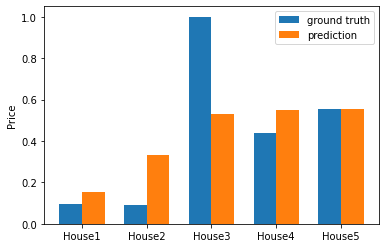

In [4]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [5]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import math # for ceiling function

In [6]:
# constants
DATASET_FILENAME = r'insurance.csv'         # filename of dataset
N_HIST_BINS = 100                           # bins per histogram
MIN_P_SPARSE = 0.50                         # minimum missing rate for sparse dataframe
SPLIT_SEED = 42                             # randomizer seed for splitting train/test data


# value types represented by `d_types` in pandas
VALUE_TYPES = {
    r'numerical': (r'int64', r'float64',),
    r'categorical': (r'object',)
}

In [7]:
# load the insurance dataset into dataframe dfin
dfin = pd.read_csv(DATASET_FILENAME)

# print the basic information of the dataset
print('\n===data frame information===')
dfin.info()

# print its statistics
print('\n===data frame stats===')
print(dfin.describe())


===data frame information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

===data frame stats===
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.0

In [8]:
def printMissing(df):
    # calculate rate of missing values
    n_missing = df.isnull().sum()
    # print the numbers and rates of missing values
    print(r'===# missing value per column===')
    print(n_missing)
# end def printMissing(df)

# call printMissing
printMissing(dfin)

# remove any feature with >50% missing values
n_missing = dfin.isnull().sum()
p_missing = n_missing/df.shape[0]
dfin = dfin.drop(dfin.columns[p_missing>MIN_P_SPARSE], axis=1)
# print the missing rate
print('\n===rate missing value per column===')
print(p_missing)

===# missing value per column===
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

===rate missing value per column===
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


There are no missing values, let's demonstrate how to fill these in.

Only numerical features may have missing data. Find these.

In [9]:
# find the numerical features
features = {}   # features by value type (init empty)
# loop through value types and corresponding dtypes
for value_type, accepted_dtypes in VALUE_TYPES.items():
    # convert dtypes to strings for comparison
    features[value_type] = dfin.dtypes.apply(str).isin(accepted_dtypes)
    # print value type and its columns
    print(fr"==={value_type} features===")
    print(dfin.columns[features[value_type]])
    print()
# next value_type, accepted_dtypes

===numerical features===
Index(['age', 'bmi', 'children', 'charges'], dtype='object')

===categorical features===
Index(['sex', 'smoker', 'region'], dtype='object')



First, check for long tail distributions.

===histogram of age===
min	 18
25%	 27.0
75%	 51.0
max	 64
IQR	 24.0
range	 46
width	 4.356013324767895
# bins	 11


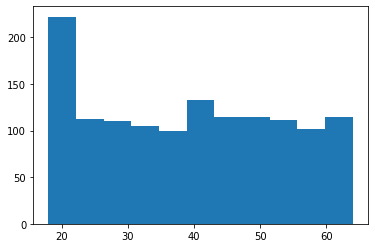

===histogram of bmi===
min	 15.96
25%	 26.29625
75%	 34.69375
max	 53.13
IQR	 8.3975
range	 37.17
width	 1.5241509122807668
# bins	 25


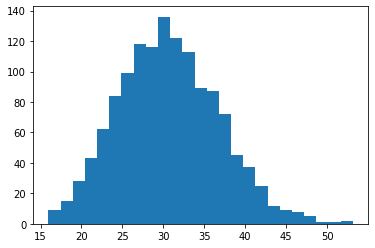

===histogram of children===
min	 0
25%	 0.0
75%	 2.0
max	 5
IQR	 2.0
range	 5
width	 0.3630011103973246
# bins	 14


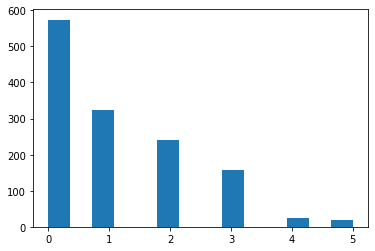

===histogram of charges===
min	 1121.8739
25%	 4740.28715
75%	 16639.912515
max	 63770.42801
IQR	 11899.625365
range	 62648.554110000005
width	 2159.7886104035842
# bins	 30


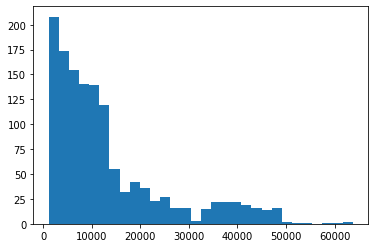

In [10]:
# select numerical features
dfin_num_columns = dfin.columns[features[r'numerical']]

# lets check the distributions
for column in dfin_num_columns:
    # find the range
    min_val = dfin[column].min()
    max_val = dfin[column].max()
    range_val = max_val - min_val
    # find the interquartile range
    p25 = dfin[column].quantile(q=0.25)
    p75 = dfin[column].quantile(q=0.75)
    iqr = p75 - p25
    # calculate the bin width
    n = dfin[column].shape[0]
    width = (2 * iqr * (n**(-1/3)))
    # calculate the number of bins
    # using Freedman–Diaconis' choice to reduce sensitivity to outliers
    n_bins = math.ceil(range_val/width)
    # print the statistics we calculated
    print(fr"===histogram of {column}===")
    print('min\t', min_val)
    print('25%\t', p25)
    print('75%\t', p75)
    print('max\t', max_val)
    print('IQR\t', iqr)
    print('range\t', range_val)
    print('width\t', width)
    print('# bins\t', n_bins)
    # plot for this feature
    plt.hist(dfin[column].values, n_bins)
    # place the plot here in the cell
    plt.show()
# next column

Of the numerical features, we can see that
* `[0]` age, `[2]` children, `[3]` charges are long tail distributions.
* `[1]` bmi are non-long tail distributions.

In [11]:
# Of the numerical features, we can see that
# [0] age, [2] children, [3] charges are long tail distributions.
# [1] bmi are non-long tail distributions.

# sets of indexes to split the data
cols = set(range(dfin_num_columns.shape[0]))    # all columns
longtails = [0, 2, 3]                           # columns in long tail dist
non_longtails = list(cols - set(longtails))     # columns in non-long tail dist

# split to long tail distributions and non-long tail distributions
dfin_longtail_columns = dfin_num_columns[list(longtails)]
dfin_non_longtail_columns = dfin_num_columns[list(non_longtails)]

# print the distribution types
print(r'===columns by distribution===')
print(r"long tails: {}".format(dfin_longtail_columns))
print(r"non_long tails: {}".format(dfin_non_longtail_columns))

# replace long tails with medians
for column in dfin_longtail_columns:
    median = dfin[column].median()
    dfin[column] = dfin[column].fillna(median)
# next column in dfin_longtail_columns

# replace non_long tails with means
for column in dfin_non_longtail_columns:
    mean = dfin[column].mean()
    dfin[column] = dfin[column].fillna(mean)
# next column in dfin_longtail_columns

# confirm none missing
print()
printMissing(dfin[dfin_num_columns])

===columns by distribution===
long tails: Index(['age', 'children', 'charges'], dtype='object')
non_long tails: Index(['bmi'], dtype='object')

===# missing value per column===
age         0
bmi         0
children    0
charges     0
dtype: int64


As for the categorical data, first

In [12]:
# select the categorical columns
dfin_cat_columns = dfin.columns[features['categorical']]

# for each column
for column in dfin_cat_columns:
    # print the variable counts
    print(dfin[column].value_counts())
    print()
# next column

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [13]:
# fill in
# 'not specified' for sex
# 'maybe' for smoker
# 'national' for region
fillins = {
    r'sex': r'not specified',
    r'smoker': r'maybe',
    r'region': r'national'
}

# in the categorical columns
for column in dfin_cat_columns:
    dfin[column] = dfin[column].fillna(fillins[column])
# next column in dfin_longtail_columns

# confirm replacements
# for each column
for column in dfin_cat_columns:
    # print the variable counts
    print(dfin[column].value_counts())
    print()
# next column

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



Next we use label encoding on all the categorical features.

In [14]:
# initialize the label encoder
labeler = LabelEncoder()

# for each category column
for column in dfin_cat_columns:
    # encode the column and store in place
    encoded = labeler.fit_transform(dfin[column])
    dfin[column] = encoded
    # print the resulting value count
    print(dfin[column].value_counts())
    print()
# next column

1    676
0    662
Name: sex, dtype: int64

0    1064
1     274
Name: smoker, dtype: int64

2    364
3    325
1    325
0    324
Name: region, dtype: int64



### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [15]:
P_TESTING = 0.2 # rate of training data

dfin_X = dfin.drop('charges', axis=1)
dfin_y = dfin['charges'].values

X_train, X_test, y_train, y_test = train_test_split(dfin_X.values, dfin_y, test_size=0.2, random_state=SPLIT_SEED)

To normalize, first check for outliers, defined as any value $1.5 I\!Q\!R$s outside of the range $[Q_1, Q_3]$.

In [16]:
# find the interquartile range
q1 = dfin.quantile(q=0.25)
q3 = dfin.quantile(q=0.75)
iqr = p75 - p25
# calculate the limits of the outlier
inlier_min = (q1 - 1.5*iqr)
inlier_max = (q3 + 1.5*iqr)
# find any values out of range
outliers = ((dfin < inlier_min) | (dfin > inlier_max))
# print the results
print(r'===inlier lower limit===')
print(inlier_min)
print()
print(r'===inlier upper limit===')
print(inlier_max)
print()
print(r'===has outliers?===')
print(outliers.any())

===inlier lower limit===
age        -17822.438047
sex        -17849.438047
bmi        -17823.141798
children   -17849.438047
smoker     -17849.438047
region     -17848.438047
charges    -13109.150897
Name: 0.25, dtype: float64

===inlier upper limit===
age         17900.438047
sex         17850.438047
bmi         17884.131797
children    17851.438047
smoker      17849.438047
region      17851.438047
charges     34489.350562
Name: 0.75, dtype: float64

===has outliers?===
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges      True
dtype: bool


We can see that age, bmi, children and charges each have outliers, but `charges` is the label. Since 3 columns, at least 1 column has outliers, we should use standardization (Z-score normalization), rather than min-max normalization.

In [17]:
# standardization
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

# find the z-score, replacing X_train, X_test
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

# print the statistics to verify normalization
print('\n===data frame stats===')
print(pd.DataFrame(X_train).describe())


===data frame stats===
                  0             1             2             3             4  \
count  1.070000e+03  1.070000e+03  1.070000e+03  1.070000e+03  1.070000e+03   
mean  -2.041980e-16 -8.964792e-17  2.310924e-15  4.648410e-17  1.328117e-17   
std    1.000468e+00  1.000468e+00  1.000468e+00  1.000468e+00  1.000468e+00   
min   -1.518194e+00 -1.024602e+00 -2.417060e+00 -9.111921e-01 -5.087470e-01   
25%   -8.784157e-01 -1.024602e+00 -7.210253e-01 -9.111921e-01 -5.087470e-01   
50%    1.016470e-02  9.759891e-01 -5.800739e-02 -8.842793e-02 -5.087470e-01   
75%    8.276587e-01  9.759891e-01  6.515707e-01  7.343363e-01 -5.087470e-01   
max    1.751782e+00  9.759891e-01  3.736342e+00  3.202629e+00  1.965613e+00   

                  5  
count  1.070000e+03  
mean  -5.312469e-17  
std    1.000468e+00  
min   -1.353256e+00  
25%   -4.561159e-01  
50%    4.410238e-01  
75%    4.410238e-01  
max    1.338164e+00  


### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [18]:
# train the model
linear = LinearRegression()
linear.fit(X_train, y_train)

# print the learned model parameter w
w = np.insert(linear.coef_, 0, linear.intercept_)
print(r'The learned model parameter w =', str(w))

# check the model fit to training data
y_train_pred = linear.predict(X_train)

# mean errors
mae_train = mean_absolute_error(y_train_pred, y_train)
mse_train = mean_squared_error(y_train_pred, y_train)
rmse_train = np.sqrt(mse_train)

print()
print(r'===fit to the training set===')
print('MAE\t', mae_train)
print('MSE\t', mse_train)
print('RMSE\t', rmse_train)

The learned model parameter w = [ 1.33460897e+04  3.61610865e+03 -9.39295411e+00  2.02830858e+03
  5.16662566e+02  9.55714338e+03 -3.02387980e+02]

===fit to the training set===
MAE	 4208.762029186573
MSE	 37280663.22256598
RMSE	 6105.789320191615


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

In [19]:
# test the model fit to testing data
y_test_pred = linear.predict(X_test)

# mean errors
mae_test = mean_absolute_error(y_test_pred, y_test)
mse_test = mean_squared_error(y_test_pred, y_test)
rmse_test = np.sqrt(mse_test)

print()
print(r'===fit to the testing set===')
print('MAE\t', mae_test)
print('MSE\t', mse_test)
print('RMSE\t', rmse_test)


===fit to the testing set===
MAE	 4186.508898366437
MSE	 33635210.43117844
RMSE	 5799.587091438359


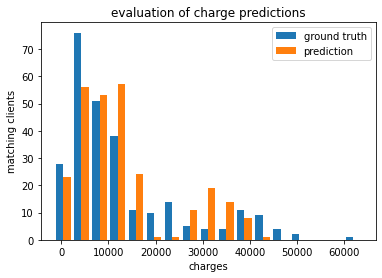

In [42]:
# plot the prediction to ground truth

# find the range
min_val = np.min(y_test, axis=0)
max_val = np.max(y_test, axis=0)
range_val = max_val - min_val
# find the interquartile range
p25 = np.quantile(y_test, q=0.25, axis=0)
p75 = np.quantile(y_test, q=0.75, axis=0)
iqr = p75 - p25
# calculate the bin width
n = y_test.shape[0]
width = (2 * iqr * (n**(-1/3)))
# calculate the number of bins
# using Freedman–Diaconis' choice to reduce sensitivity to outliers
n_bins = math.ceil(range_val/width)

# combine the y_test and y_test_pred for plotting
df_pred_evaluation = pd.DataFrame({'ground truth': y_test, 'prediction': y_test_pred})
# plot for the test data and corresponding predictions
fig, ax = plt.subplots()
ax.hist(df_pred_evaluation, n_bins)
# label the plot
ax.set_title('evaluation of charge predictions')
ax.set_xlabel('charges')
ax.set_ylabel('matching clients')
ax.legend(df_pred_evaluation.columns)
# place the plot here in the cell
plt.show()

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [20]:
# your code